In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/liver_cancer_prediction.csv")
df.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [4]:
df.shape

(160292, 25)

In [5]:
df.columns

Index(['Country', 'Region', 'Population', 'Incidence_Rate', 'Mortality_Rate',
       'Gender', 'Age', 'Alcohol_Consumption', 'Smoking_Status',
       'Hepatitis_B_Status', 'Hepatitis_C_Status', 'Obesity', 'Diabetes',
       'Rural_or_Urban', 'Seafood_Consumption', 'Herbal_Medicine_Use',
       'Healthcare_Access', 'Screening_Availability', 'Treatment_Availability',
       'Liver_Transplant_Access', 'Ethnicity', 'Preventive_Care',
       'Survival_Rate', 'Cost_of_Treatment', 'Prediction'],
      dtype='object')

Eliminando multicolinearidade

In [6]:
# Agora utilizar o Label Encoding para tratar de variáveis ordenadas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking_Status'] = le.fit_transform(df['Smoking_Status'])
df['Diabetes'] = le.fit_transform(df['Diabetes'])
df['Healthcare_Access'] = le.fit_transform(df['Healthcare_Access'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Seafood_Consumption'] = le.fit_transform(df['Seafood_Consumption'])
df['Alcohol_Consumption'] = le.fit_transform(df['Alcohol_Consumption'])
df['Preventive_Care'] = le.fit_transform(df['Preventive_Care'])
df['Hepatitis_B_Status'] = le.fit_transform(df['Hepatitis_B_Status'])
df['Hepatitis_C_Status'] = le.fit_transform(df['Hepatitis_C_Status'])
df['Rural_or_Urban'] = le.fit_transform(df['Rural_or_Urban'])
df['Herbal_Medicine_Use'] = le.fit_transform(df['Herbal_Medicine_Use'])
df['Screening_Availability'] = le.fit_transform(df['Screening_Availability'])
df['Treatment_Availability'] = le.fit_transform(df['Treatment_Availability'])
df['Liver_Transplant_Access'] = le.fit_transform(df['Liver_Transplant_Access'])
df['Prediction'] = le.fit_transform(df['Prediction'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  int64  
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  int64  
 8   Smoking_Status           160292 non-null  int64  
 9   Hepatitis_B_Status       160292 non-null  int64  
 10  Hepatitis_C_Status       160292 non-null  int64  
 11  Obesity                  160292 non-null  int64  
 12  Diabetes                 160292 non-null  int64  
 13  Rural_or_Urban           160292 non-null  int64  
 14  Seaf

In [15]:
y = df['Mortality_Rate']
X = df.drop(['Prediction', 'Mortality_Rate', 'Country', 'Region'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = modelo.predict(X_test)

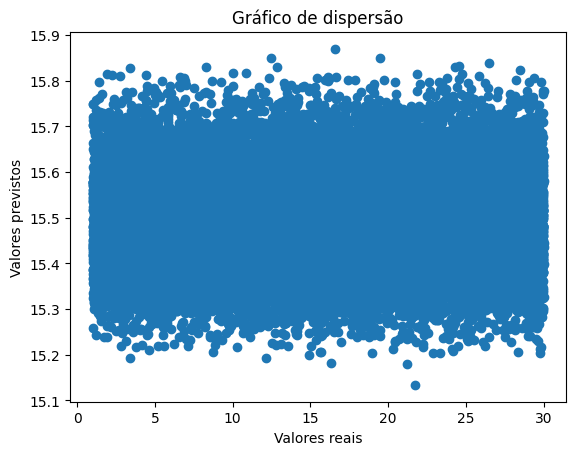

In [19]:
# Agora o scatterplot
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Gráfico de dispersão')
plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro quadrático médio (MSE): {mse}")
print(f"Coeficiente: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficiente de determinação: {r2}")

Erro quadrático médio (MSE): 70.27810811378127
Coeficiente: [ 2.61772662e-11  2.38791148e-03  8.66101613e-02  2.97726175e-04
  8.43815912e-03  5.79916665e-02  1.18981408e-01 -5.05202117e-02
  3.18504201e-02  1.44809322e-03  7.99586626e-02 -1.63606363e-02
 -5.82544322e-02  6.40194451e-03  3.30646665e-02 -2.11636238e-02
 -6.65464004e-03  1.85259551e-04 -1.60441879e-03  5.47587950e-04
 -4.89861719e-07]
Intercepto: 15.23245051973098
Coeficiente de determinação: -0.0004606878610717846
